最全总结！Pandas 十大清洗技巧 ！！

In [ ]:
# 在机器学习实验中，Pandas数据清洗是确保数据质量的关键步骤，可以有效处理缺失值、重复数据和异常值。
# 数据清洗直接影响模型的性能，因为干净的数据能提高模型的准确性和鲁棒性。
# 通过Pandas的数据清洗，可以为后续的特征工程和建模奠定坚实的基础。
# 今儿详细聊的 Pandas 十大数据清洗技巧有：
# 处理缺失值
# 处理重复数据
# 数据类型转换
# 处理异常值
# 数据标准化与归一化
# 字符串操作
# 时间序列数据处理
# 条件筛选与过滤
# 数据分箱与离散化数据合并与连接

In [2]:
# 1. 处理缺失值主要功能在数据集中，缺失值（NaN）是常见的现象。
# 缺失值的处理是数据清洗中的重要部分，因为它们可能影响模型的性能。
# 常见的处理方法包括删除含有缺失值的行或列，或者使用特定值填充缺失值。
# Python实现删除缺失值使用dropna()方法可以删除包含NaN的行或列。
# 通过设置参数axis=0或axis=1，可以分别删除行或列。

In [4]:
import pandas as pd

data = {'Name':  ['Tom', 'Jerry', 'Spike', None],
        'Age':[ 20, 21,None, 22],
        'City': ['New York', None, 'Chicago', 'Boston']}

df=pd.DataFrame(data)

#删除包含NaN的行
df_cleaned=df.dropna()
print(df_cleaned)

  Name   Age      City
0  Tom  20.0  New York


In [ ]:
# 填充缺失值使用fillna()方法可以填充缺失值，常见填充方式包括使用固定值、前向填充（ffill）或后向填充（bfill）

In [6]:
#填充缺失值为0
df_filled=df.fillna(0)
print(df_filled)

    Name   Age      City
0    Tom  20.0  New York
1  Jerry  21.0         0
2  Spike   0.0   Chicago
3      0  22.0    Boston


In [9]:
#前向填充
df_ffill=df.fillna(method='ffill')        
print(df_ffill)

    Name   Age      City
0    Tom  20.0  New York
1  Jerry  21.0  New York
2  Spike  21.0   Chicago
3  Spike  22.0    Boston


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_9620\3172870604.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill=df.fillna(method='ffill')


In [10]:
#后向填充
df_bfill=df.fillna(method='bfill')
print(df_bfill)

    Name   Age      City
0    Tom  20.0  New York
1  Jerry  21.0   Chicago
2  Spike  22.0   Chicago
3   None  22.0    Boston


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_9620\443627168.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill=df.fillna(method='bfill')


2. 处理重复数据主要功能重复数据会导致模型的偏差和冗余信息。Pandas提供了检测和删除重复数据的功能。Python实现检测重复数据使用duplicated()方法可以检测重复行，返回一个布尔序列，表示每行是否为重复项。通过设置参数keep='first'或keep='last'，可以分别保留第一个或最后一个重复项。Python实现删除重复数据使用drop_duplicates()方法可以删除重复行。通过设置参数subset，可以指定检查重复项的列。#%%

In [12]:
data = {'Name':  ['Tom', 'Jerry', 'Spike', 'Tom'],
        'Age':[ 20, 21, 22, 20],
        'City': ['New York', 'Chicago', 'Boston', 'New York']}
df=pd.DataFrame(data)

#检测重复行
duplicated=df.duplicated()
print(duplicated)

0    False
1    False
2    False
3     True
dtype: bool


删除重复数据使用drop_duplicates()方法删除重复行，可以保留首次出现的行或最后一次出现的行。

In [13]:
#删除重复行
df_cleaned=df.drop_duplicates()
print(df_cleaned)

    Name  Age      City
0    Tom   20  New York
1  Jerry   21   Chicago
2  Spike   22    Boston


3. 数据类型转换主要功能不同的数据类型（如整数、浮点数、字符串）在模型训练时有不同的处理方式。有时需要将数据转换为适当的数据类型以符合模型的要求或简化计算。Python实现转换数据类型使用astype()方法可以将某一列转换为指定类型，例如将字符串转换为整数。

In [15]:
data={'Name':['Tom','Jerry','Spike'],
'Age':['20','21','22'],
'Salary':[3000.5,3200.0,3150.75]}

df=pd.DataFrame(data)

#将Age列从字符串转换为整数
df['Age']=df['Age'].astype(int)
print(df.dtypes)

Name       object
Age         int32
Salary    float64
dtype: object


4. 处理异常值主要功能异常值（outliers）是显著偏离正常数据范围的数据点，它们可能会显著影响模型的表现。通常需要识别并处理这些异常值。Python实现使用描述性统计使用describe()方法可以查看数据的基本统计信息，包括均值、中位数、标准差等，这可以帮助识别异常值。

In [17]:
data={'Name':['Tom','Jerry','Spike','Butch'],
'Age':[20,21,22,100],
'Salary':[3000.5,3200.0,3150.75,40000]}

df=pd.DataFrame(data)

# 查看描述性统计
print(df['Age'].describe())

count      4.000000
mean      40.750000
std       39.508438
min       20.000000
25%       20.750000
50%       21.500000
75%       41.500000
max      100.000000
Name: Age, dtype: float64


通过条件过滤移除异常值可以根据具体条件过滤掉异常值，例如仅保留Age在合理范围内的记录。

In [18]:
#移除Age异常值
df_cleaned=df[df['Age']<=60]
print(df_cleaned)

    Name  Age   Salary
0    Tom   20  3000.50
1  Jerry   21  3200.00
2  Spike   22  3150.75


5. 数据标准化与归一化主要功能在机器学习中，数据标准化（Standardization）和归一化（Normalization）是常用的预处理步骤，特别是在涉及距离计算或梯度下降的算法中。这些步骤有助于消除数据中的量纲影响，使模型训练更加稳定和高效。Python实现数据标准化标准化通常将数据调整为均值为0，标准差为1的分布。可以手动进行，也可以使用sklearn.preprocessing模块中的StandardScaler。

In [19]:
from sklearn.preprocessing import StandardScaler

data = {'Feature1': [1.0, 2.0, 3.0, 4.0, 5.0],
 'Feature2': [100, 150, 200, 250, 300]}

df = pd.DataFrame(data)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_scaled)

   Feature1  Feature2
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214


数据归一化归一化通常将数据缩放到0-1之间。可以使用min-max方法来实现。

In [20]:
df_normalized=(df-df.min())/(df.max()-df.min())
print(df_normalized)

   Feature1  Feature2
0      0.00      0.00
1      0.25      0.25
2      0.50      0.50
3      0.75      0.75
4      1.00      1.00


6. 字符串操作主要功能Pandas提供了强大的字符串操作功能，可以对文本数据进行清洗和预处理，例如去除空格、大小写转换、正则表达式匹配等。Python实现去除空格使用str.strip()可以去除字符串中的前后空格。

In [21]:
data={'Name':['Tom','Jerry','Spike']}
df=pd.DataFrame(data)

df['Name']=df['Name'].str.strip()
print(df)

    Name
0    Tom
1  Jerry
2  Spike


大小写转换可以使用str.lower()或str.upper()将字符串转换为小写或大写。

In [22]:
df['Name']=df['Name'].str.lower()
print(df)

    Name
0    tom
1  jerry
2  spike


字符串替换可以使用str.replace()方法替换字符串中的子串。

In [24]:
df['Name']=df['Name'].str.replace('tom','Tom')
print(df)

    Name
0    Tom
1  jerry
2  spike


7. 时间序列数据处理主要功能时间序列数据是机器学习和数据分析中常见的数据类型。Pandas提供了丰富的时间序列处理功能，例如日期解析、时间序列重采样等。Python实现日期解析使用pd.to_datetime()可以将字符串转换为日期时间格式。

In [27]:
data={'Date':['2021-01-01','2021-02-01','2021-03-01'],'value':[100,200,300]}
df=pd.DataFrame(data)

df['Date']=pd.to_datetime(df['Date'])
print(df)
print(df.dtypes)

        Date  value
0 2021-01-01    100
1 2021-02-01    200
2 2021-03-01    300
Date     datetime64[ns]
value             int64
dtype: object


时间序列重采样使用resample()可以对时间序列数据进行重采样，例如按天、周、月等进行聚合操作。

In [28]:
rng=pd.date_range('2021-01-01',periods=100,freq='D')
ts=pd.Series(range(len(rng)),index=rng)

#按周重采样并求和
ts_resampled=ts.resample('W').sum()
print(ts_resampled)

2021-01-03      3
2021-01-10     42
2021-01-17     91
2021-01-24    140
2021-01-31    189
2021-02-07    238
2021-02-14    287
2021-02-21    336
2021-02-28    385
2021-03-07    434
2021-03-14    483
2021-03-21    532
2021-03-28    581
2021-04-04    630
2021-04-11    579
Freq: W-SUN, dtype: int64


8. 条件筛选与过滤主要功能在数据清洗过程中，经常需要根据特定条件筛选和过滤数据，以便聚焦于分析目标或移除不相关的数据。Python实现单条件筛选可以直接对DataFrame进行条件操作，返回符合条件的行。

In [30]:
data={'Name':['Tom','Jerry','Spike','Butch'],
'Age':[20,21,22,20],
'Salary':[3000.5,3200.0,3150.75,2900.0]}

df=pd.DataFrame(data)

#筛选Age大于20的行
df_filtered=df[df['Age']>20]
print(df_filtered)

    Name  Age   Salary
1  Jerry   21  3200.00
2  Spike   22  3150.75


In [ ]:
#多条件筛选可以使用&（与）和|（或）连接多个条件。
#筛选Age大于20且Salary大于3000的行
df_filtered=df[(df['Age']>20)&(df['Salary']>3000)]
print(df_filtered)


9. 数据分箱与离散化主要功能数据分箱（Binning）或离散化（Discretization）可以将连续变量转换为分类变量，有助于减少模型的复杂性并提高可解释性。Python实现使用pd.cut()进行分箱pd.cut()可以将数据分割成离散的区间。可以指定区间的边界和标签。

In [31]:
data={'Age':[18,22,25,30,35,40,50,60,70,80]}
df=pd.DataFrame(data)

#将Age分为3个区间
df['Age_Group']=pd.cut(df['Age'],bins=3,labels=["Young","Middle-aged","Old"])
print(df)

   Age    Age_Group
0   18        Young
1   22        Young
2   25        Young
3   30        Young
4   35        Young
5   40  Middle-aged
6   50  Middle-aged
7   60          Old
8   70          Old
9   80          Old


使用pd.qcut()按分位数分箱pd.qcut()根据数据的分布按分位数进行分箱。可以指定分箱的数量。

In [32]:
#将Age按分位数分为4组
df['Age_Quartile']=pd.qcut(df['Age'],4)
print(df)

   Age    Age_Group     Age_Quartile
0   18        Young  (17.999, 26.25]
1   22        Young  (17.999, 26.25]
2   25        Young  (17.999, 26.25]
3   30        Young    (26.25, 37.5]
4   35        Young    (26.25, 37.5]
5   40  Middle-aged     (37.5, 57.5]
6   50  Middle-aged     (37.5, 57.5]
7   60          Old     (57.5, 80.0]
8   70          Old     (57.5, 80.0]
9   80          Old     (57.5, 80.0]


10. 数据合并与连接主要功能在数据清洗过程中，常常需要将来自不同来源的数据进行合并和连接，以构建完整的分析数据集。Pandas提供了强大的数据合并与连接功能。Python实现使用pd.merge()进行数据合并pd.merge()函数可以根据一个或多个键将两个DataFrame合并为一个。可以指定合并的方式（内连接、左连接、右连接、外连接）。

In [33]:
data1={'Key':['A','B','C','D'],'Value1':[1,2,3,4]}

data2={'Key':['A','B','E','F'],
'Value2':[5,6,7,8]}

df1=pd.DataFrame(data1)
df2=pd.DataFrame(data2)

#按照Key列进行合并（内连接）
df_merged=pd.merge(df1,df2,on='Key',how='inner')
print(df_merged)

  Key  Value1  Value2
0   A       1       5
1   B       2       6


In [34]:
#使用pd.concat()进行数据连接pd.concat()函数可以沿指定轴连接两个或多个DataFrame。可以指定连接的方式（行连接或列连接）。
df_concat=pd.concat([df1,df2],axis=0)
print(df_concat)

  Key  Value1  Value2
0   A     1.0     NaN
1   B     2.0     NaN
2   C     3.0     NaN
3   D     4.0     NaN
0   A     NaN     5.0
1   B     NaN     6.0
2   E     NaN     7.0
3   F     NaN     8.0


代表案例假设我们有一个虚拟的客户数据集，包含客户的年龄、收入、购买次数、以及客户的注册时间。我们将进行以下步骤：数据加载与展示。处理缺失值（填充和删除）。转换数据类型（将注册时间转换为日期格式）。处理异常值（删除极端收入值）。数据分箱（根据年龄进行分箱）。数据可视化（绘制年龄分布和收入与购买次数的散点图）

原始数据：
   CustomerID   Age        Income  Purchases RegistrationDate
0           1  56.0  21864.848417          5       2021-12-12
1           2  69.0  29498.267917          9       2021-10-29
2           3  46.0  59544.576625         10       2021-12-29
3           4  32.0           NaN          4       2021-08-06
4           5  60.0  57140.638811          5       2021-05-21


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_9620\715513026.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # 用中位数填充


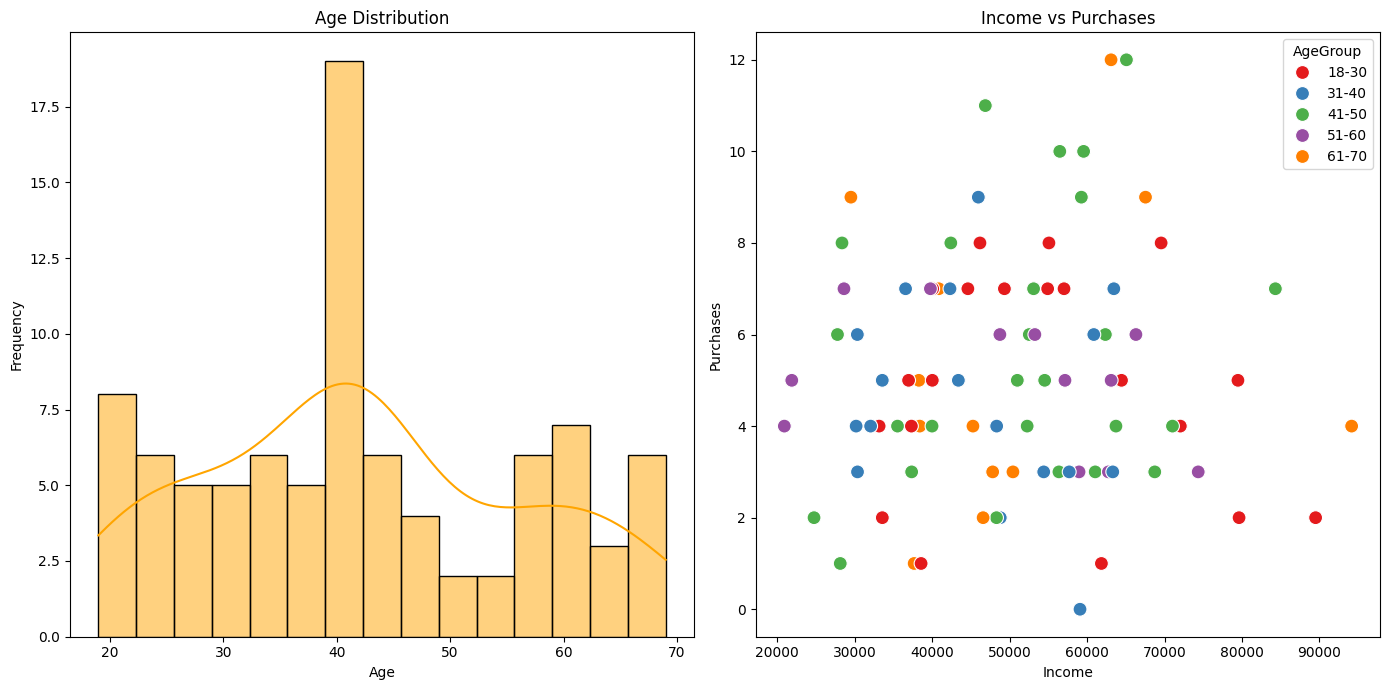

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置随机种子
np.random.seed(42)

# 生成虚拟数据集，并将Age和Income列设为浮点类型以便引入NaN
data = {
    'CustomerID': range(1, 101),
    'Age': np.random.randint(18, 70, size=100).astype(float),  # 将Age列设为浮点类型
    'Income': np.random.normal(50000, 15000, 100),
    'Purchases': np.random.poisson(5, 100),
    'RegistrationDate': pd.to_datetime('2021-01-01') + pd.to_timedelta(np.random.randint(0, 365, 100), unit='d')
}

# 随机引入缺失值
for col in ['Age', 'Income']:
    data[col][np.random.choice(100, 10, replace=False)] = np.nan

df = pd.DataFrame(data)

# Step 1: 数据展示
print("原始数据：")
print(df.head())

# Step 2: 处理缺失值
df['Age'].fillna(df['Age'].median(), inplace=True)  # 用中位数填充
df.dropna(subset=['Income'], inplace=True)  # 删除收入为空的行

# Step 3: 数据类型转换
df['RegistrationDate'] = pd.to_datetime(df['RegistrationDate'])

# Step 4: 处理异常值（删除极端收入值）
income_threshold = df['Income'].mean() + 3 * df['Income'].std()
df = df[df['Income'] < income_threshold]

# Step 5: 数据分箱（按年龄分箱）
df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61-70'])

# Step 6: 数据可视化
plt.figure(figsize=(14, 7))

# 子图1: 年龄分布柱状图
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=15, kde=True, color='orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 子图2: 收入与购买次数的散点图
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Income', y='Purchases', hue='AgeGroup', palette='Set1', s=100)
plt.title('Income vs Purchases')
plt.xlabel('Income')
plt.ylabel('Purchases')
plt.tight_layout()
plt.savefig('data_cleaning.png')
plt.show()